<a href="https://colab.research.google.com/github/samiha-mahin/Human-Activity-Recognition/blob/main/HAR_Preprocess_%26_Model_Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/content/HAR.csv')
df.sample(5)

,9.609650462,2.300538338,2.144411872,5.400097818,2.09694813,9.634166354,stay
2501,-0.190688,-10.403062,1.805235,54.299830,20.821603,13.906503,walk
1057,-3.161847,-10.997036,1.319985,96.975703,47.173945,14.441649,down stairs
1807,-2.240085,-9.218936,1.921538,48.292061,48.388336,22.027334,up stairs
1488,-0.650965,-9.881565,1.455285,39.704477,10.543966,6.696417,walk
1860,-0.844715,-12.118786,1.054803,15.896189,34.307553,15.841591,up stairs


In [19]:
# Assign appropriate column names
df.columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'label']

# Check the result
df.head()


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,9.577768,2.282697,2.079824,5.354778,2.079341,9.675361,stay
1,9.580927,2.271344,2.043194,5.323989,2.048942,9.707330,stay
2,9.572380,2.230444,2.010800,5.326597,2.032995,9.758871,stay
3,9.547868,2.196874,1.994174,5.319192,2.032566,9.817590,stay
4,9.565006,2.179697,1.951135,5.297095,2.030031,9.850362,stay


In [20]:
df.shape

(2899, 7)

In [21]:
df.sample(5)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
131,1.606250,-4.992115,-8.691674,6.646136,8.698682,9.586259,stay
2712,0.326624,-10.221892,1.703521,22.596915,16.699906,16.455609,walk
846,-1.945200,-9.309250,1.742632,84.501801,45.170019,13.980316,down stairs
941,-1.740418,-11.445077,1.459741,90.168372,21.978991,9.393577,down stairs
2803,4.383141,-6.106297,-1.408456,30.081376,26.302956,26.876703,walk


In [22]:
df.describe()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
count,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,-0.543139,-9.239902,1.106257,48.851852,28.510595,13.976943
std,2.855270,3.087863,2.118085,31.036148,19.751612,6.959507
min,-4.714144,-12.467998,-9.278339,0.911072,0.208599,0.284453
25%,-2.219577,-10.611767,1.343728,34.526819,14.951942,8.986122
50%,-0.849103,-10.345409,1.712259,46.873750,21.659774,12.402286
75%,-0.375010,-9.394343,1.938191,59.141402,41.102054,18.561095
max,10.147256,2.378515,2.948303,227.557927,92.564159,36.585112


**Dataset Overview**

| Column   | Description                           |
| -------- | ------------------------------------- |
| `acc_x`  | Accelerometer X-axis                  |
| `acc_y`  | Accelerometer Y-axis                  |
| `acc_z`  | Accelerometer Z-axis                  |
| `gyro_x` | Gyroscope X-axis                      |
| `gyro_y` | Gyroscope Y-axis                      |
| `gyro_z` | Gyroscope Z-axis                      |
| `label`  | Activity label (`walk`, `stay`, etc.) |


In [24]:
print(df['label'].value_counts())

label
walk           1416
down stairs     691
up stairs       566
stay            226
Name: count, dtype: int64


In [25]:
df.isnull().sum()

,0
acc_x,0
acc_y,0
acc_z,0
gyro_x,0
gyro_y,0
gyro_z,0
label,0


# **Exploratory Data Analysis**

## **Correlation Heatmap**

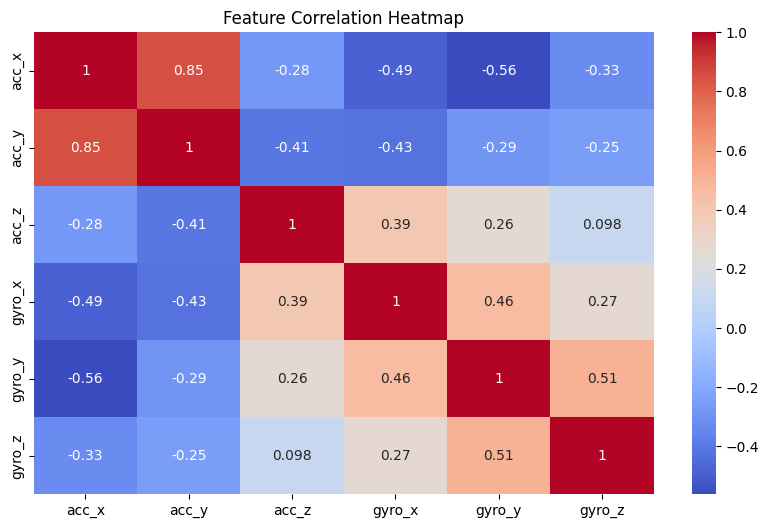

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 🔍 **Key Observations from the Heatmap**

### 🔴 **High Positive Correlation:**

* **`acc_x` and `acc_y`** → `0.85`
  ✅ Very strong correlation
  🔎 Means these two accelerometer axes often move together — possibly due to body movement on a flat surface (like walking).
  👉 You may **drop one** or combine them (e.g., use magnitude instead) to reduce redundancy.

---

### 🔵 **Moderate Negative Correlation:**

* **`acc_x` vs. `gyro_y` = -0.56**
* **`acc_x` vs. `gyro_x` = -0.49**
* **`acc_y` vs. `gyro_x` = -0.43**

🔎 Suggests that when **acceleration increases along certain axes**, the **rotation along those directions decreases** — possibly indicating opposing forces (like when staying still vs. moving arms).

---

### 🟠 **Moderate Positive Correlation:**

* **`gyro_x` and `gyro_y` = 0.46**
* **`gyro_y` and `gyro_z` = 0.51**

🔎 These gyroscope axes often rotate together, possibly due to **combined upper body or arm movement**, like during turning or stair climbing.

---

### 🟢 **Low / Weak Correlation:**

* **`acc_z` is weakly correlated with everything** (max: 0.39 with `gyro_x`)
  🔎 `acc_z` might capture more **independent motion**, like vertical jumps, up/down stairs, etc.
  ✅ This makes it a **valuable feature** for distinguishing activities.

* **`gyro_z` has low correlation with acc data**
  🔎 It may be capturing **head turning** or other isolated rotational movement.

---

## ✅ Summary (for Feature Decisions)

| Pair                         | Correlation  | Action                                               |
| ---------------------------- | ------------ | ---------------------------------------------------- |
| `acc_x` vs `acc_y`           | **0.85**     | High redundancy – consider combining or dropping one |
| `gyro_x`, `gyro_y`, `gyro_z` | \~0.45–0.51  | Keep all — they complement each other                |
| `acc_z`                      | Low with all | Keep — it's unique                                   |
| `gyro_z`                     | Weak overall | Keep — may detect special movement (e.g. twisting)   |




## **Pairplot**

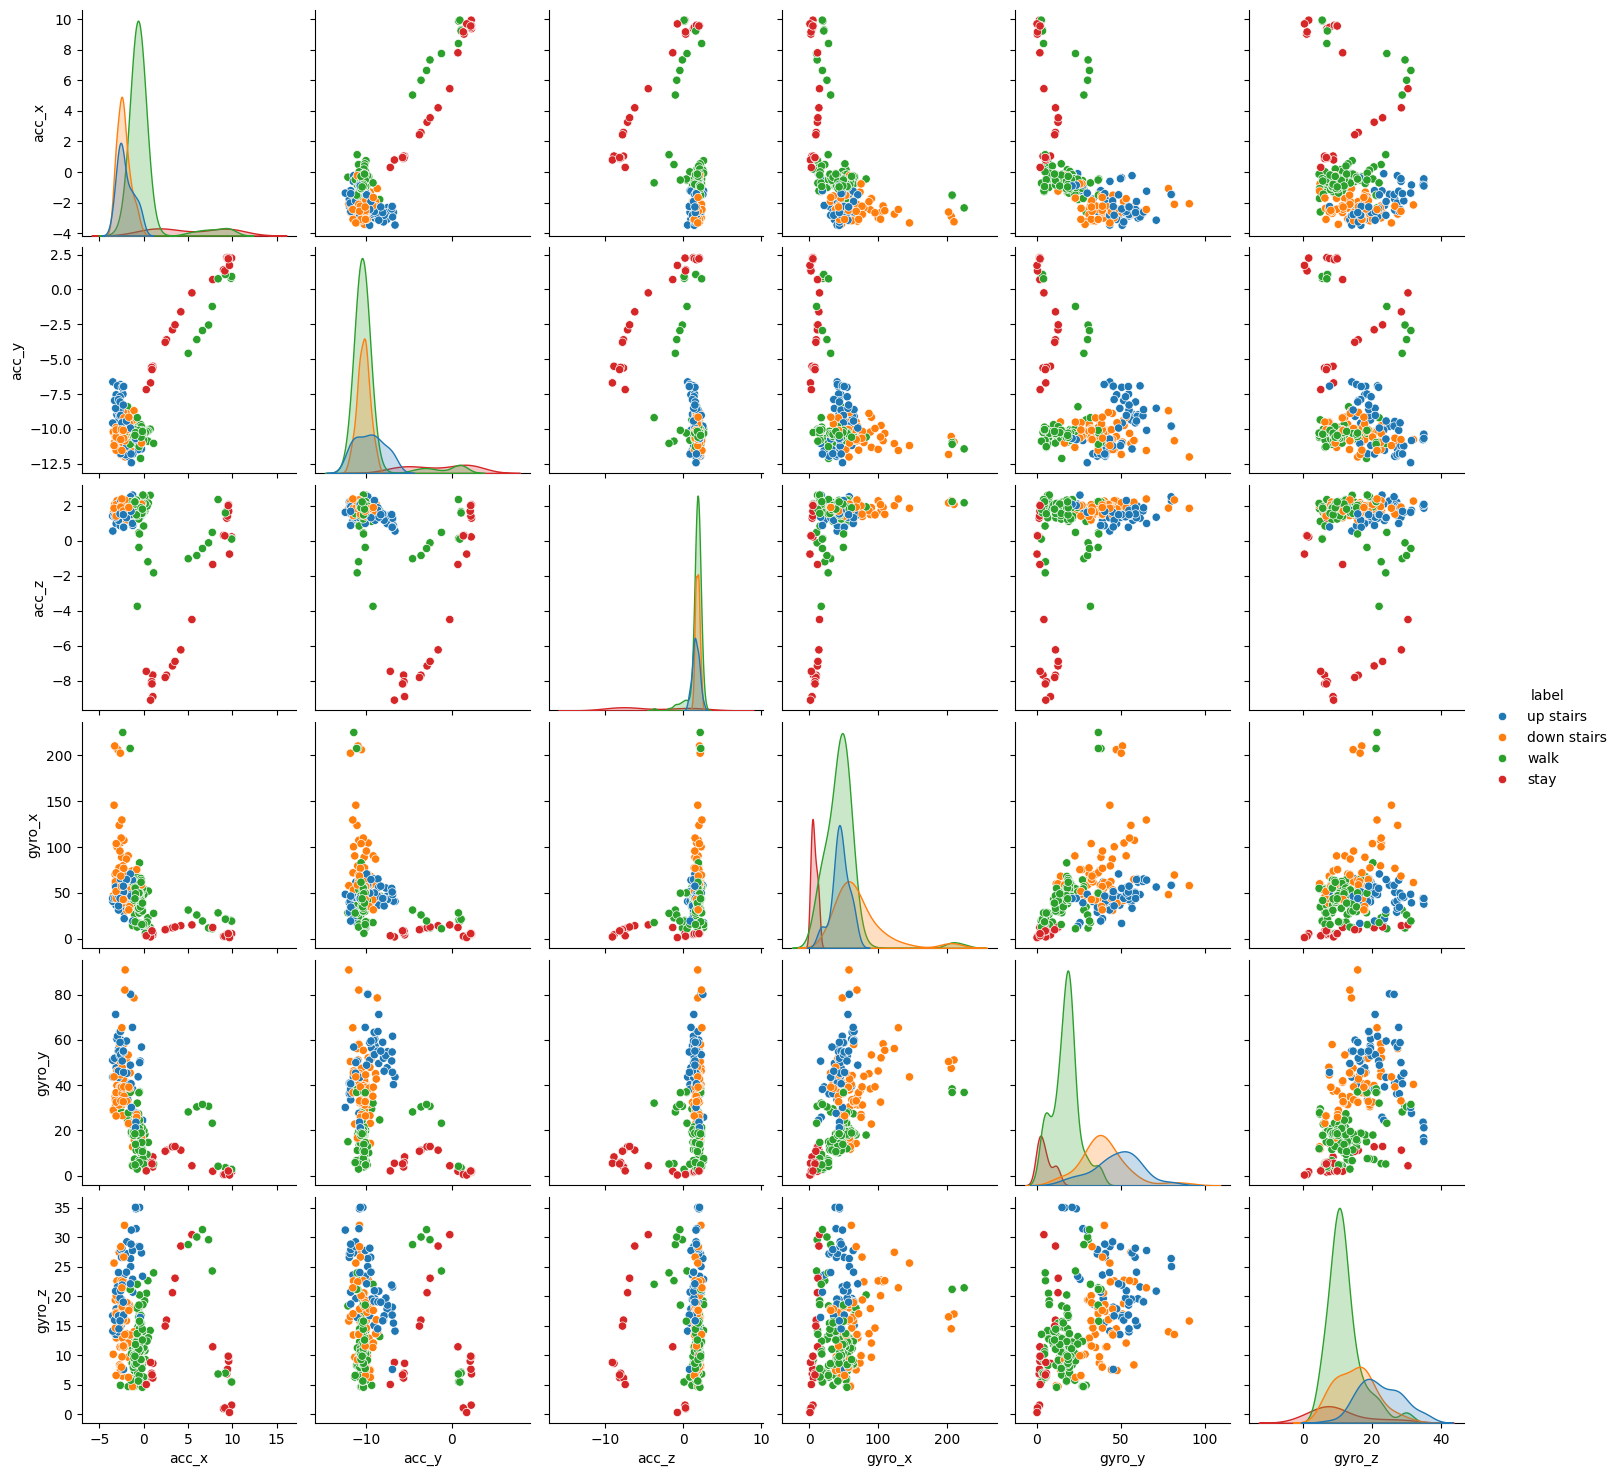

In [29]:
sns.pairplot(df.sample(300), hue='label')

# **Tree Based Models**

## **Random Forest**

 Classification Report:

              precision    recall  f1-score   support

 down stairs       0.96      0.98      0.97       129
        stay       1.00      0.98      0.99        41
   up stairs       0.98      0.96      0.97       110
        walk       1.00      1.00      1.00       300

    accuracy                           0.99       580
   macro avg       0.99      0.98      0.98       580
weighted avg       0.99      0.99      0.99       580



<Figure size 700x500 with 0 Axes>

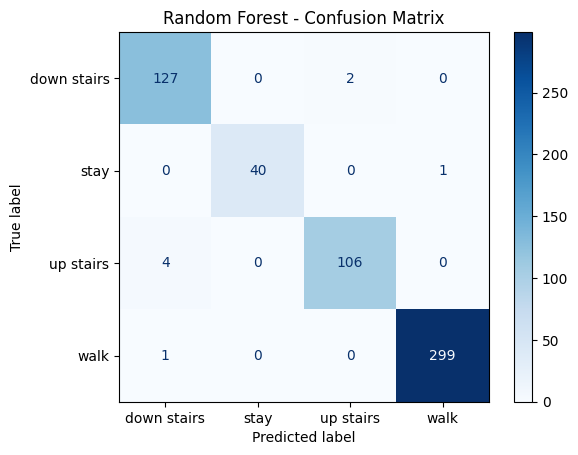

✅ Train Accuracy: 1.0000
✅ Test Accuracy : 0.9862
✅ No major overfitting detected.

📊 Cross-Validation Scores (5-fold): [0.769  0.9086 0.7345 0.8241 0.7772]
📌 Mean CV Accuracy: 0.8027


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


X = df.drop('label', axis=1)
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(" Classification Report:\n")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

plt.figure(figsize=(7, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ✅ Accuracy Scores
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy : {test_acc:.4f}")

# ✅ Overfitting Check
if train_acc - test_acc > 0.1:
    print("⚠️ Model may be overfitting.")
else:
    print("✅ No major overfitting detected.")

# ✅ Cross-Validation Accuracy
cv_scores = cross_val_score(clf, X, y, cv=5)
print("\n📊 Cross-Validation Scores (5-fold):", np.round(cv_scores, 4))
print(f"📌 Mean CV Accuracy: {np.mean(cv_scores):.4f}")




## 🧪 **Model Evaluation Summary – Random Forest Classifier**

### ✅ **1. Classification Performance on Test Set**

| Metric                    | Value    |
| ------------------------- | -------- |
| **Accuracy**              | `98.62%` |
| **F1-Score (Macro Avg)**  | `98%`    |
| **Weighted Avg F1-Score** | `99%`    |

🔍 **Interpretation**:

* The model performs **exceptionally well** on the test set, with an **overall accuracy of 98.6%**.
* The **f1-score** is very high across all activity labels, especially for **"walk"**, which achieved a **perfect score** (precision, recall, f1 = 1.00).
* Even less frequent activities like **"stay"** and **"up stairs"** are classified with **>96% accuracy**, indicating good generalization.

---

### ✅ **2. Overfitting Check**

| Dataset   | Accuracy |
| --------- | -------- |
| Train Set | 100.00%  |
| Test Set  | 98.62%   |

🔍 **Interpretation**:

* There’s **no significant overfitting**. Even though training accuracy is perfect (which is common for Random Forests), the test accuracy remains very high.
* Since the **difference is < 2%**, the model is **well-generalized** and **not memorizing** the training data.

---

### ✅ **3. Cross-Validation (5-Fold)**

| Fold | Accuracy |
| ---- | -------- |
| 1    | 76.9%    |
| 2    | 90.9%    |
| 3    | 73.5%    |
| 4    | 82.4%    |
| 5    | 77.7%    |

| Metric            | Value    |
| ----------------- | -------- |
| **Mean Accuracy** | `80.27%` |

🔍 **Interpretation**:

* The cross-validation accuracy is **lower than the test accuracy**, indicating the model may be sensitive to how the data is split.
* Variability across folds suggests some **class imbalance or non-uniform distribution**, especially for smaller classes like `"stay"`.

---

### 📌 **Conclusion**

* The **Random Forest model performs excellently** on held-out test data.
* There is **no major overfitting**.
* Some variance in cross-validation suggests you could explore:

  * More **robust sampling**
  * **Stratified splits**
  * Or even **feature engineering** to stabilize performance

